<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Диффузионные модели и свертка

## Образцы использования

**Сфера применения**

- **Генерация изображений** - синтез новых изображений
- **Обусловленная генерация изображений** - синтез изображений на основе текстового описания, меток классов, векторных представлений и т.д.
- **Сверхразрешение** - техника повышения качества изображения, которая позволяет увеличивать размер изображения в пикселях с сохранением или улучшением его качества; детали изображения при предсказываются при увеличении его размера
- **Инпейнтинг** - заполнение недостающих или поврежденных частей изображения правдоподобными элементами, в т.ч. при удалении объектов на изображении (ср. восстановление информации по контексту)
- **Колоризация** - добавление цвета на монохромные изображения, изображения в оттенках серого; цвет предсказывается на основе распознанного контента и / или сопоставления оттенков

Загрузка библиотеки `diffusers` из `HuggingFace`

In [ ]:
!pip install diffusers

In [ ]:
!pip install accelerate

**Пример 1**. Генерация изображений

NB! Включите GPU

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/852 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

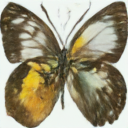

In [ ]:
from diffusers import DiffusionPipeline
# это диффузионная модель, дообученная на датасете с бабочками
generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128").to("cuda")
image = generator().images[0]
image

**Пример 2**. Обусловленная генерация на основе текстового описания

Текстовое описание мы называем *промптом*, а задачу - *text-to-image*

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

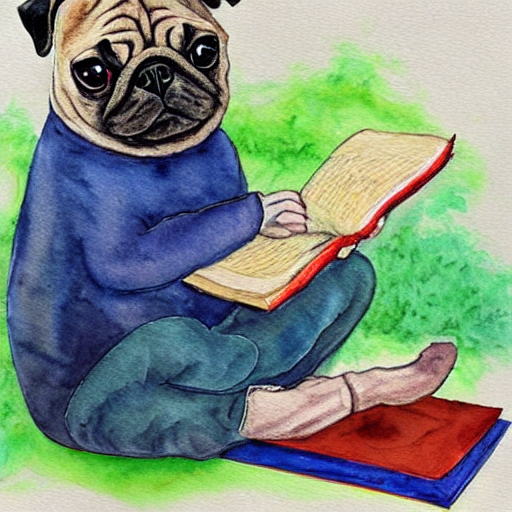

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
# загружаем модель, которая поддерживает такое обуславливание, например, stable diffusion
pipeline = AutoPipelineForText2Image.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")
# промпт
image = pipeline("a pug is reading a book, watercolor, masterpiece").images[0]
image

**Пример 3**. Сверхразрешение

Мы специально запустим модель с настройками по умолчанию, чтобы внимательно рассмотреть *артефакты* - элементы изображения, появившиеся в результате нейросетевой обработки. По таким элементам легко отличить подлинное изображение от синтетического

unet/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

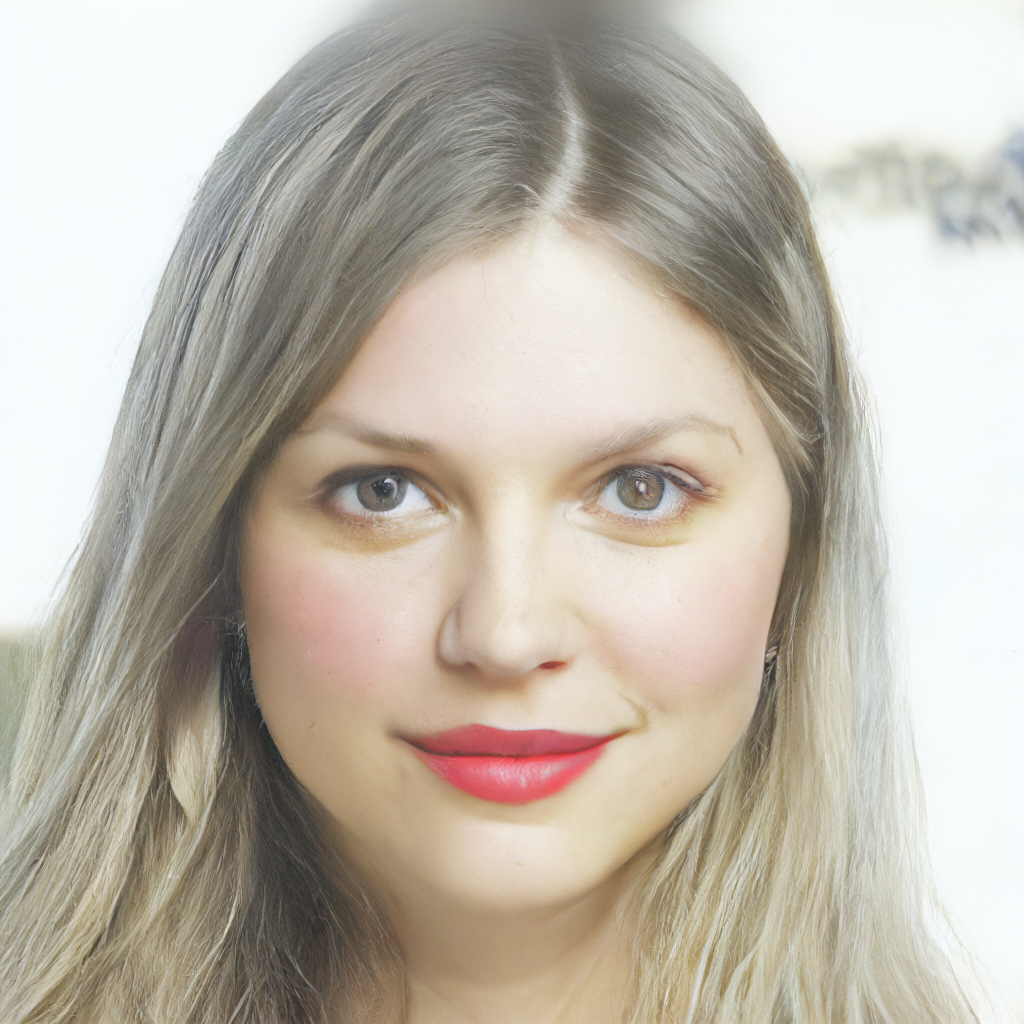

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
# диффузионная модель для высокого разрещения
pipeline = LDMSuperResolutionPipeline.from_pretrained("CompVis/ldm-super-resolution-4x-openimages").to("cuda")
# пример изображения, предоставленнный авторами этой модели
url = "https://user-images.githubusercontent.com/38061659/199705896-b48e17b8-b231-47cd-a270-4ffa5a93fa3e.png"
# загружаем изображение
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
# увеличиваем разрешение
upscaled_image = pipeline(low_res_img).images[0]
upscaled_image

**Пример 4**. Инпейнтинг

Такая функция может быть встроена в фоторедактор. Для работы нам понадобится не только изображение, но и его маска - черно-белая копия, в которой выделена область для инпейнтинга

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

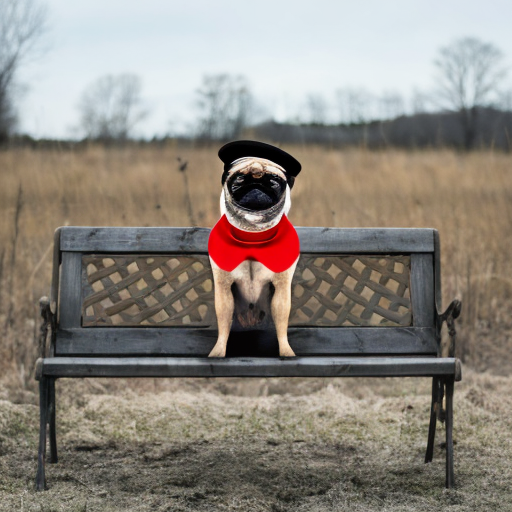

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionInpaintPipeline
# модель stable diffusion зафайнтьюнили для инпейнтинга
pipeline = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting").to("cuda")
# пример изображения и его маски для инпейнтинга, предоставленнный авторами этой модели
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"
# загружаем изображение
response = requests.get(img_url)
img = Image.open(BytesIO(response.content)).convert("RGB")
# загружаем маску
response = requests.get(mask_url)
mask = Image.open(BytesIO(response.content)).convert("RGB")
# прописываем в промпте, чем мы хотим заполнить маску
image = pipeline(prompt="a pug in a red hat, photorealistic, centered composition", image=img, mask_image=mask).images[0]
image

**Пример 5**. Колоризация

Не для всех задач нам нужны диффузионные модели - иногда достаточно сверточных нейросетей. Смотрим [демо-колоризацию](https://huggingface.co/spaces/ali-ghamdan/colorizer)

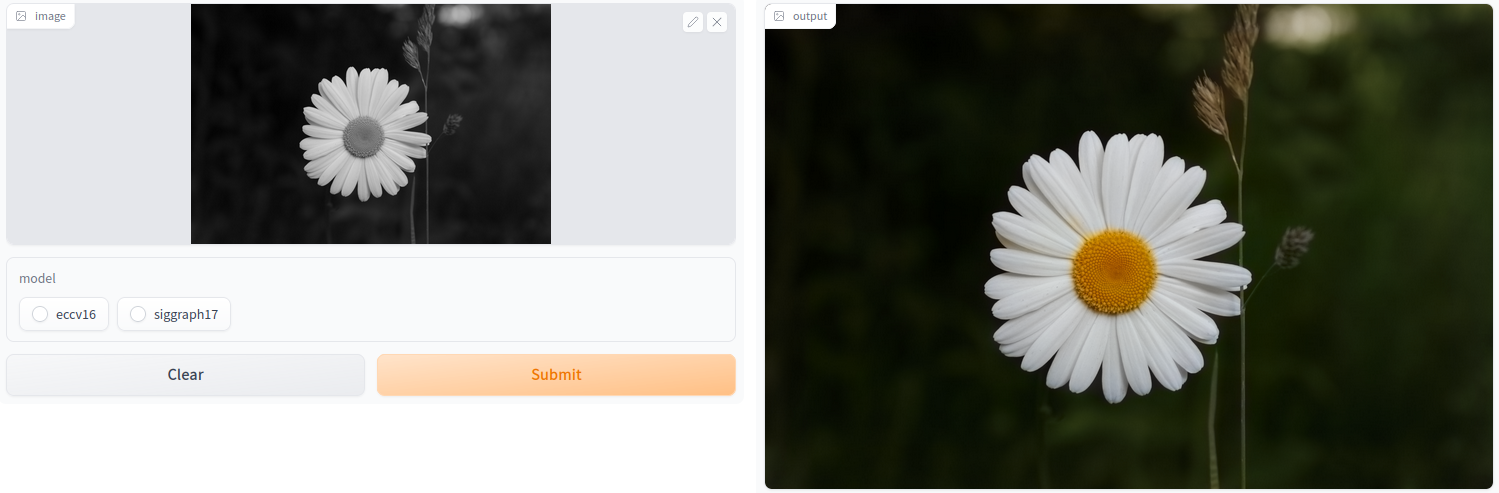

## Низкоуровневые функции

Свертка - операция, которая используется для создания признаков, на основе которых будет обучаться модель машинного обучения, сверточная нейронная сеть.

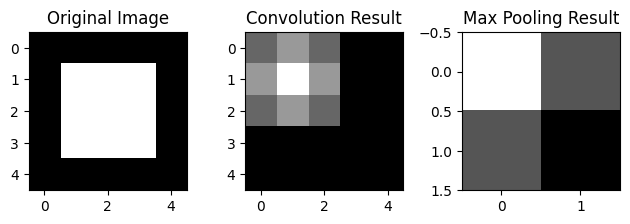

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# образец изображения 5x5 (создадим квадрат путем генерации изображения из его матричного представления)
image = np.array([[0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0]])

# аналогичным образом задаем ядро, т.е. фильтр для свертки
kernel = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1]])

# операция свертки
def convolution(image, kernel):
    result = np.zeros_like(image)
    # итерация по пикселям
    for y in range(image.shape[0]-2):
        for x in range(image.shape[1]-2):
            # поэлементное умножение ядра на попадающую под него область, суммирование результатов
            result[y, x] = np.sum(image[y:y+3, x:x+3] * kernel)
    return result

# операция пулинга (max pooling), размер 2x2
def max_pooling(image, size=(2, 2)):
    # пулинг помогает сократить размерность матрицы, оставив только самые важные признаки, обнаруженные с помощью свертки
    pooled_image = np.zeros((image.shape[0] // size[0], image.shape[1] // size[1]))
    for y in range(0, image.shape[0] // size[0]):
        for x in range(0, image.shape[1] // size[1]):
            # проходимся по каждому пикселю, для каждой позиции матрицы заданного размера (здесь 2x2),
            # находим максимальное значение внутри этого окна и сохраняем только его
            pooled_image[y, x] = np.max(image[y*size[0]:(y+1)*size[0], x*size[1]:(x+1)*size[1]])
    return pooled_image

# выведем на экран первоначальное изображение
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# ... результат свертки
convolved_image = convolution(image, kernel)
plt.subplot(1, 3, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolution Result')

# ... результат пулинга
pooled_image = max_pooling(convolved_image)
plt.subplot(1, 3, 3)
plt.imshow(pooled_image, cmap='gray')
plt.title('Max Pooling Result')

plt.tight_layout()
plt.show()


Денойзинг - операция, которая используется для восстановления зашумленных изображений, основа работы диффузионных моделей.

Epoch [1/10], Step [100/938], Loss: 0.0707
Epoch [1/10], Step [200/938], Loss: 0.0669
Epoch [1/10], Step [300/938], Loss: 0.0634
Epoch [1/10], Step [400/938], Loss: 0.0679
Epoch [1/10], Step [500/938], Loss: 0.0725
Epoch [1/10], Step [600/938], Loss: 0.0664
Epoch [1/10], Step [700/938], Loss: 0.0677
Epoch [1/10], Step [800/938], Loss: 0.0680
Epoch [1/10], Step [900/938], Loss: 0.0680
Epoch [2/10], Step [100/938], Loss: 0.0688
Epoch [2/10], Step [200/938], Loss: 0.0661
Epoch [2/10], Step [300/938], Loss: 0.0672
Epoch [2/10], Step [400/938], Loss: 0.0655
Epoch [2/10], Step [500/938], Loss: 0.0676
Epoch [2/10], Step [600/938], Loss: 0.0701
Epoch [2/10], Step [700/938], Loss: 0.0681
Epoch [2/10], Step [800/938], Loss: 0.0664
Epoch [2/10], Step [900/938], Loss: 0.0681
Epoch [3/10], Step [100/938], Loss: 0.0656
Epoch [3/10], Step [200/938], Loss: 0.0699
Epoch [3/10], Step [300/938], Loss: 0.0665
Epoch [3/10], Step [400/938], Loss: 0.0713
Epoch [3/10], Step [500/938], Loss: 0.0654
Epoch [3/10

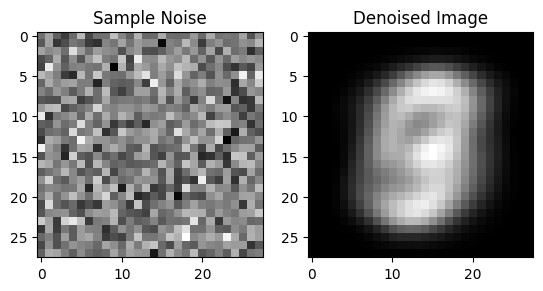

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

# описываем нейросетевую модель
class LatentDiffusion(nn.Module):
    def __init__(self):
        super(LatentDiffusion, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )

    def forward(self, z):
        return self.model(z)

# генерация случайного шума
def generate_noise(batch_size, latent_size):
    return torch.randn(batch_size, latent_size)

# денойзинг: x = шум, y = изображение из датасета
def denoise_image(image, model):
    return model(image)

# датасет MNIST для обучения модели
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# параметры обучения
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# инициализация модели
latent_diffusion_model = LatentDiffusion()

# алгоритм оптимизации
optimizer = optim.Adam(latent_diffusion_model.parameters(), lr=0.001)

# процесс обучения
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # приводим изображения к виду одномерных векторов
        images = images.view(images.size(0), -1)

        # зашумливаем изображение
        noise = generate_noise(images.size(0), 784)  # размер матрицы = размер изображения

        # производим денойзинг: передаем шум в модель
        denoised_images = denoise_image(noise, latent_diffusion_model)

        # считаем потери
        loss = nn.MSELoss()(denoised_images, images)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # выводим отчет об обучении
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# создаем случайный шум и передаем его обученной модели
sample_noise = generate_noise(1, 784)
sample_denoised_image = denoise_image(sample_noise, latent_diffusion_model)

# выводим на экран шум и то, что модель дешифровала с помощью обученных весов
plt.subplot(1, 2, 1)
plt.imshow(sample_noise.view(28, 28).detach().numpy(), cmap='gray')
plt.title('Sample Noise')

plt.subplot(1, 2, 2)
plt.imshow(sample_denoised_image.view(28, 28).detach().numpy(), cmap='gray')
plt.title('Denoised Image')

plt.show()